In [2]:
import pandas as pd
from datetime import datetime

In [3]:
df = pd.read_csv('../results/forum.csv')

In [22]:
df.shape

(4199708, 13)

In [4]:
df.head()

,title,text,id,parent_id,author,time
0,-15 giorniiiii ❤❤❤ inziamo preparare vasi sar...,NaN,752573,752573,3091481,2019-08-15 15:43
1,comment,molto belli 😊,cmnt_21179081,752573,1655978,2019-08-15 16:18
2,curiosità su “il castello delle cerimonie”,... o precedentemente “il boss delle cerimonie”.,752575,752575,2851869,2019-08-15 16:23
3,-30 giorni,-30 al grande giorno.. e anche il mio lui iniz...,752433,752433,843513,2019-08-14 17:00
4,comment,a dubai dove allogerete?😘😊noi partiamo il 16se...,cmnt_21179091,752433,3275895,2019-08-15 16:22


In [5]:
df['text']=df['text'].fillna("")

In [6]:
df['time'] = df['time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M'))

In [7]:
df['year'] = df['time'].apply(lambda x: x.year)
df['month'] = df['time'].apply(lambda x: x.month)
df['day'] = df['time'].apply(lambda x: x.day)

In [8]:
df['count_bolle'] = (df['text'] + df['title']).apply(lambda x: x.split().count('bolle'))

In [9]:
df['count_palloncini'] = (df['text'] + df['title']).apply(lambda x: x.split().count('palloncini'))

In [10]:
df[df['count_bolle']>0].shape

(6064, 11)

In [11]:
df[(df.year==2016) & (df.count_bolle>0)].shape

(945, 11)

In [12]:
df[(df.year==2016) & (df.count_palloncini>0)].shape

(585, 11)

In [13]:
df.describe()

,parent_id,year,month,day,count_bolle,count_palloncini
count,4.199708e+06,4.199708e+06,4.199708e+06,4.199708e+06,4.199708e+06,4.199708e+06
mean,3.930732e+05,2.016631e+03,5.893799e+00,1.569264e+01,1.547965e-03,1.023166e-03
std,2.001985e+05,1.718660e+00,3.340722e+00,8.783949e+00,4.228999e-02,3.564032e-02
min,3.240000e+02,2.009000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.404660e+05,2.016000e+03,3.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00
50%,3.831220e+05,2.017000e+03,5.000000e+00,1.600000e+01,0.000000e+00,0.000000e+00
75%,5.554480e+05,2.018000e+03,9.000000e+00,2.300000e+01,0.000000e+00,0.000000e+00
max,7.525750e+05,2.019000e+03,1.200000e+01,3.100000e+01,7.000000e+00,8.000000e+00


In [14]:
df[(df['count_bolle']>0) | (df['count_palloncini']>0)].count()['id']

9658

In [15]:
df['has_bolle'] =  df['count_bolle']>0
df['has_palloncini'] =  df['count_palloncini']>0

In [24]:
df.shape

(4199708, 13)

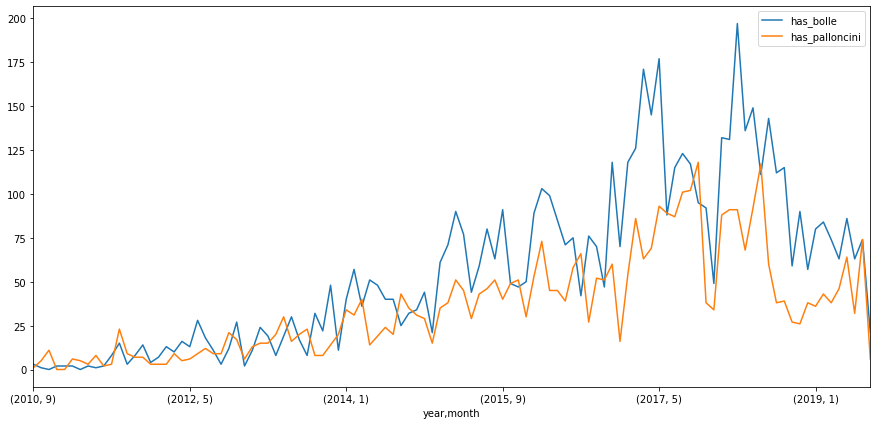

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,7))
df[(df['count_bolle']>0) | (df['count_palloncini']>0)].groupby(['year','month']).sum()[['has_bolle','has_palloncini']].plot(ax=ax)